#### Linked List Cycle (Easy) [TIP102-2-1]
- LeetCode: https://leetcode.com/problems/linked-list-cycle/
- CodePath Solution: https://guides.codepath.org/compsci/Linked-List-Cycle

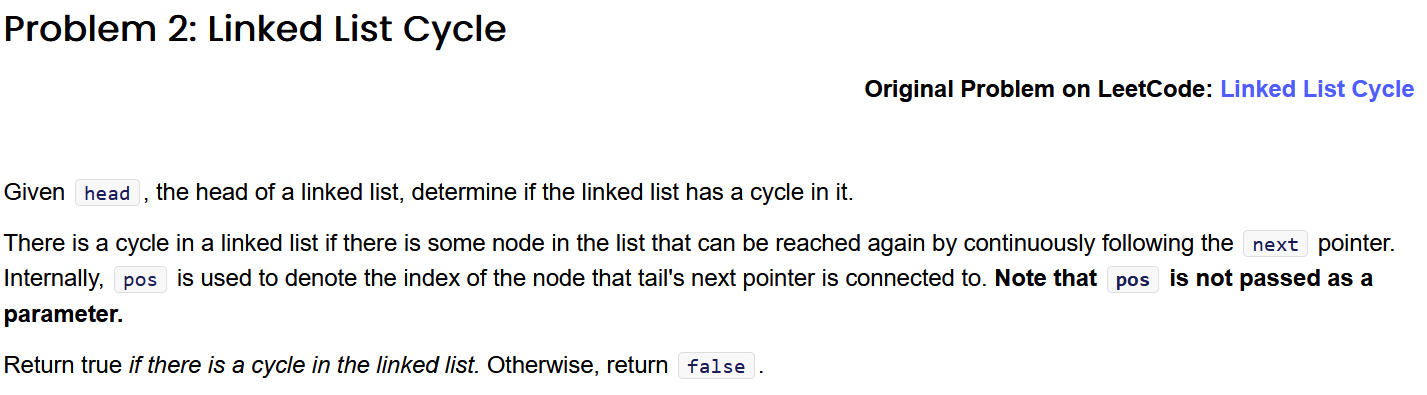

In [1]:
#Implement ListNode class and helper functions
class ListNode:
    def __init__(self, val, next=None):
        self.val = val
        self.next = next

def compare_linked_lists(l1, l2):
    if not(l1) and not(l2): return True
    if not(l1) or not(l2): return False
    if l1.val != l2.val: return False
    if l1.next == None: return l2.next == None
    return compare_linked_lists(l1.next, l2.next)

In [2]:
# Helper function to create a linked list with a cycle index
def create_linked_list(values, cycle_index=None):
    """
    Creates a linked list from the provided list of values.
    If cycle_index is specified, it creates a cycle in the linked list.

    Args:
        values (list): List of values to create nodes from.
        cycle_index (int, optional): Index at which to create a cycle. Defaults to None.

    Returns:
        ListNode: Head of the linked list.
    """
    if not values:
        # If the values list is empty, return None (no linked list to create)
        return None

    # Create the head of the linked list
    head = ListNode(values[0])
    current = head

    # Variable to keep track of the node where the cycle should start
    cycle_node = None

    # Iterate over the remaining values to create subsequent nodes
    for index, value in enumerate(values[1:], start=1):
        # Create a new node and link it to the current node
        current.next = ListNode(value)
        current = current.next

        # If the current index matches the cycle_index, store this node as cycle_node
        if index == cycle_index:
            cycle_node = current

    # If cycle_index is specified, create a cycle by pointing the last node to cycle_node
    if cycle_index is not None:
        current.next = cycle_node

    return head

In [3]:
"""
Detecting cycle in linked list using fast and slow pointers
"""
def has_cycle(head: ListNode):
    #if empty list or single node
    if not head or not head.next:
        return False
    
    #init slow and fast pointers at head and head.next
    slow = head
    fast = head.next

    #while not at last node
    while fast and fast.next:
        
        #if fast == slow or fast.next == slow, return True
        if fast == slow:
            return True
        
        #move slow by one
        #move fast by two
        slow = slow.next
        fast = fast.next.next

    #if processed entire list and no cycle return False
    return False

### Other Solution

In [4]:
def has_cycle_blocks(head):
    try:
        
        #init fast and slow pointers
        slow = head
        fast = head.next
        
        #while slow != fast move slow by 1, fast by 2
        while slow != fast:
            slow = slow.next
            fast = fast.next.next
        
        #if out of while loop slow == fast, return True there is a cycle
        return True
    
    except:
        #exception thrown when fast == None or fast.next == None
        # if that case return False, entire list has been proccessed and no cycle found
        return False

In [7]:
"""
Detecting cycle in linked list using a set
traverse the linked list and add each node to the set as long as all nodes are unique return false
"""
def has_cycle_set(head):
    list_set = set()
    while head:
        if head in list_set:
            return True

        list_set.add(head)
        head = head.next
    return False

In [6]:
# Test cases
def run_tests(test_function):
    # Test case 1: Empty list
    head = create_linked_list([])
    print("Test case 1 (Empty list):", test_function(head) == False)

    # Test case 2: Single node without cycle
    head = create_linked_list([1])
    print("Test case 2 (Single node without cycle):", test_function(head) == False)

    # Test case 4: Multiple nodes without cycle
    head = create_linked_list([1, 2, 3, 4, 5])
    print("Test case 4 (Multiple nodes without cycle):", test_function(head) == False)

    # Test case 6: Multiple nodes with cycle in the middle
    head = create_linked_list([1, 2, 3, 4, 5], cycle_index=2)
    print("Test case 6 (Multiple nodes with cycle in the middle):", test_function(head) == True)

# Run the test cases
run_tests(has_cycle)
print("")
run_tests(has_cycle_blocks)

Test case 1 (Empty list): True
Test case 2 (Single node without cycle): True
Test case 4 (Multiple nodes without cycle): True
Test case 6 (Multiple nodes with cycle in the middle): True

Test case 1 (Empty list): True
Test case 2 (Single node without cycle): True
Test case 4 (Multiple nodes without cycle): True
Test case 6 (Multiple nodes with cycle in the middle): True
